## Netflix

A partir de los datos históricos, buscamos predecir cuántas semanas va a estar un título top ten en las diferentes regiones, teniendo el cuenta el género y el content type.


In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#Importa las librerias matplotlib, seaborn y Scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import matplotlib.cm as cm


In [2]:
#Importamos el archivo donde está la data para realizar el modelo de aprendizaje supervisado
Netflix = pd.read_excel('netflix_modelo.xlsx')

In [3]:
#Accedemos al tipo de estrutura de datos con el type.
type(Netflix)

pandas.core.frame.DataFrame

In [4]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Realease Year":"realease_year","Genre":"genre","Origin":"origin"}, inplace=True)

Netflix.columns

Index(['region', 'country_name', 'country_iso2', 'week', 'category',
       'weekly_rank', 'show_title', 'season_title',
       'cumulative_weeks_in_top_10', 'realease_year', 'genre'],
      dtype='object')

In [5]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

Netflix.dtypes

region                        object
country_name                  object
country_iso2                  object
week                          object
category                      object
weekly_rank                    int64
show_title                    object
season_title                  object
cumulative_weeks_in_top_10     int64
realease_year                  int64
genre                         object
dtype: object

In [6]:
#Tranformamos los tipos de datos object por strings. 

Netflix['region'] = Netflix['region'].astype("string")
Netflix['country_name'] = Netflix['country_name'].astype("string")
Netflix['country_iso2'] = Netflix['country_iso2'].astype("string")
Netflix['category'] = Netflix['category'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['season_title'] = Netflix['season_title'].astype("string")

Netflix.dtypes

region                        string
country_name                  string
country_iso2                  string
week                          object
category                      string
weekly_rank                    int64
show_title                    string
season_title                  string
cumulative_weeks_in_top_10     int64
realease_year                  int64
genre                         object
dtype: object

In [7]:
#Convertimos la columna week en datetime
Netflix['week'] = pd.to_datetime(Netflix['week'])

Netflix.dtypes

region                                string
country_name                          string
country_iso2                          string
week                          datetime64[ns]
category                              string
weekly_rank                            int64
show_title                            string
season_title                          string
cumulative_weeks_in_top_10             int64
realease_year                          int64
genre                                 object
dtype: object

In [8]:
#Usamos .info para tener un detalle más completo de la info del dataset, por ejemplo:El número total de filas y columnas en el DataFrame,
#Los nombres de las columnas, la cantidad de valores no nulos en cada columna, el tipo de dato de cada columna,
#la cantidad de memoria utilizada por el DataFrame.

Netflix.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197024 entries, 0 to 197023
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   region                      197024 non-null  string        
 1   country_name                197024 non-null  string        
 2   country_iso2                197024 non-null  string        
 3   week                        197024 non-null  datetime64[ns]
 4   category                    197024 non-null  string        
 5   weekly_rank                 197024 non-null  int64         
 6   show_title                  197024 non-null  string        
 7   season_title                96884 non-null   string        
 8   cumulative_weeks_in_top_10  197024 non-null  int64         
 9   realease_year               197024 non-null  int64         
 10  genre                       197024 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(

In [9]:
Netflix.isna().sum() #Vemos qué features tienen valores faltantes

region                             0
country_name                       0
country_iso2                       0
week                               0
category                           0
weekly_rank                        0
show_title                         0
season_title                  100140
cumulative_weeks_in_top_10         0
realease_year                      0
genre                              0
dtype: int64

In [10]:
#Luego realizamos un detalle estadístico de las columnas numéricas aplicando .describe().
Netflix.describe()

,weekly_rank,cumulative_weeks_in_top_10,realease_year
count,197024.000000,197024.000000,197024.000000
mean,5.475962,3.779189,2018.580559
std,2.872879,7.409091,6.011709
min,1.000000,1.000000,1935.000000
25%,3.000000,1.000000,2018.000000
50%,5.000000,2.000000,2021.000000
75%,8.000000,3.000000,2022.000000
max,10.000000,102.000000,2023.000000


In [11]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.head(100) #sacar estaciones 

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,realease_year,genre
0,Latin America,Argentina,AR,2023-08-13,Movie,1,Heart of Stone,<NA>,1,2023,Action
1,Latin America,Argentina,AR,2023-08-13,Movie,2,"Good Luck to You, Leo Grande",<NA>,2,2022,Comedy
2,Latin America,Argentina,AR,2023-08-13,Movie,3,Shark Bait,<NA>,2,2022,Horror
3,Latin America,Argentina,AR,2023-08-13,Movie,4,Clifford the Big Red Dog,<NA>,2,2019,Adventure
4,Latin America,Argentina,AR,2023-08-13,Movie,5,Paradise,<NA>,3,2023,Action
...,...,...,...,...,...,...,...,...,...,...,...
95,Latin America,Argentina,AR,2023-07-16,Series,6,Record of Ragnarok,Record of Ragnarok: Season 2,2,2021,Sci-Fi
96,Latin America,Argentina,AR,2023-07-16,Series,7,King the Land,King the Land: Season 1,1,2023,Drama
97,Latin America,Argentina,AR,2023-07-16,Series,8,Gossip Girl,Gossip Girl: Season 1,1,2007,Drama
98,Latin America,Argentina,AR,2023-07-16,Series,9,Sonic Prime,Sonic Prime: Season 2,1,2022,Animation


In [12]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.tail(100)

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,realease_year,genre
196924,Asia,Vietnam,VN,2021-08-08,Series,4,Vincenzo,Vincenzo: Season 1,6,2021,Action
196925,Asia,Vietnam,VN,2021-08-08,Series,5,"Nevertheless,","Nevertheless,: Season 1",6,2021,Drama
196926,Asia,Vietnam,VN,2021-08-08,Series,6,Crash Landing on You,Crash Landing on You: Season 1,6,2019,War
196927,Asia,Vietnam,VN,2021-08-08,Series,7,Prison Playbook,Prison Playbook: Season 1,5,2017,Drama
196928,Asia,Vietnam,VN,2021-08-08,Series,8,Hospital Playlist,Hospital Playlist: Season 1,6,2020,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
197019,Asia,Vietnam,VN,2021-07-04,Series,6,Reply 1988,Reply 1988: Season 1,1,2015,Comedy
197020,Asia,Vietnam,VN,2021-07-04,Series,7,"Nevertheless,","Nevertheless,: Season 1",1,2021,Drama
197021,Asia,Vietnam,VN,2021-07-04,Series,8,Too Hot to Handle,Too Hot to Handle: Season 2,1,2020,Reality
197022,Asia,Vietnam,VN,2021-07-04,Series,9,Record of Ragnarok,Record of Ragnarok: Season 1,1,2021,Sci-Fi


In [13]:
generos = Netflix['genre'].tolist()

In [14]:
#Utilizamos str.strip para eliminar espacios iniciales y finales para normalizar los géneros

Netflix['genre'] = Netflix['genre'].str.strip()

print(Netflix['genre'])

0            Action
1            Comedy
2            Horror
3         Adventure
4            Action
            ...    
197019       Comedy
197020        Drama
197021      Reality
197022       Sci-Fi
197023          War
Name: genre, Length: 197024, dtype: object


In [15]:
# Normalizamos los géneros
Netflix['genre'] = Netflix['genre'].str.capitalize()
generos_unicos_ordenados = sorted(Netflix['genre'].unique()) #los ordenamos alfabéticamente


print(generos_unicos_ordenados)

['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Kids', 'Music', 'Mystery', 'Reality', 'Romance', 'Sci-fi', 'Sports', 'Suspense', 'Talk show', 'Thriller', 'True crime', 'War', 'Western']


In [16]:
#Importamos el archivo que contiene información adicional acerca de la plataforma
excel_file = pd.ExcelFile('entorno.xlsx')

In [17]:
# El archivo excel contiene varias hojas por lo que creamos un diccionario y variables para poder acceder a cada una de ellas
nombres = ['market_cap', 'world_libraries', 'global_users', 'suscribers_by_region', 'revenue_years']

# Diccionario
hojas_diccionario = {}

In [18]:
#Creamos una variable para cada una de las hojas
market_cap = excel_file.parse('market_cap')
world_libraries = excel_file.parse('world_libraries')
global_users = excel_file.parse('global_users')
revenue_years = excel_file.parse('revenue_years')

## Limpieza market_cap

In [19]:
market_cap.info

<bound method DataFrame.info of      Rank                       Name   Symbol      marketcap  price (USD)  \
0       1          Alphabet (Google)     GOOG  1656972247040     131.8500   
1       2                     Amazon     AMZN  1311598837760     127.1200   
2       3  Meta Platforms (Facebook)     META   772488298496     300.2100   
3       4                    Tencent    TCEHY   368177807360      38.6700   
4       5                    Alibaba     BABA   220907683840      86.7400   
..    ...                        ...      ...            ...          ...   
277   278            Verb Technology     VERB        3151838       0.7002   
278   279    Grom Social Enterprises     GROM        1915561       1.3700   
279   280                       Winc    WBEVQ           2659       0.0002   
280   281                       Ozon  OZON.ME              0       0.0000   
281   282             Gamer Pakistan     GPAK              0       0.0000   

           country  
0    United States  
1

In [20]:
market_cap.columns

Index(['Rank', 'Name', 'Symbol', 'marketcap', 'price (USD)', 'country'], dtype='object')

In [21]:
market_cap.rename(columns={"Rank":"rank","Name":"company","Symbol":"symbol","price (USD)":"price_usd"}, inplace=True)

market_cap.columns

Index(['rank', 'company', 'symbol', 'marketcap', 'price_usd', 'country'], dtype='object')

In [22]:
market_cap.head(20)

,rank,company,symbol,marketcap,price_usd,country
0,1,Alphabet (Google),GOOG,1656972247040,131.85,United States
1,2,Amazon,AMZN,1311598837760,127.12,United States
2,3,Meta Platforms (Facebook),META,772488298496,300.21,United States
3,4,Tencent,TCEHY,368177807360,38.67,China
4,5,Alibaba,BABA,220907683840,86.74,China
5,6,Netflix,NFLX,167332315136,377.60,United States
6,7,Pinduoduo,PDD,130294816768,98.07,China
7,8,ServiceNow,NOW,114027847680,558.96,United States
8,9,Booking Holdings (Booking.com),BKNG,110072954880,3083.95,United States
9,10,Uber,UBER,93981491200,45.99,United States


In [23]:
market_cap.dtypes

rank           int64
company       object
symbol        object
marketcap      int64
price_usd    float64
country       object
dtype: object

In [24]:
#Cambiar tipo de dato
market_cap["rank"]=market_cap["rank"].astype("float")
market_cap["company"]=market_cap["company"].astype("string")
market_cap["symbol"]=market_cap["symbol"].astype("string")
market_cap["marketcap"]=market_cap["marketcap"].astype("float")
market_cap["country"]=market_cap["country"].astype("string")

market_cap.dtypes

rank         float64
company       string
symbol        string
marketcap    float64
price_usd    float64
country       string
dtype: object

## Limpieza global_users

In [25]:
global_users.columns

Index(['Year', 'Netflix Subscribers', 'Unidad'], dtype='object')

In [26]:
#Usamos.rename para renombrar las columnas de global_users.

global_users.rename(columns={"Year":"year","Netflix Subscribers":"netflix_subscribers"}, inplace=True)

global_users.columns

Index(['year', 'netflix_subscribers', 'Unidad'], dtype='object')

In [27]:
global_users.dtypes

year                    object
netflix_subscribers    float64
Unidad                  object
dtype: object

In [28]:
#Cambiamos el tipo de dato
global_users['year'] = global_users['year'].astype("string")

global_users['netflix_subscribers'] = global_users['netflix_subscribers'].astype("float")

global_users['Unidad'] = global_users['Unidad'].astype("string")
                                                                            
global_users.dtypes

year                    string
netflix_subscribers    float64
Unidad                  string
dtype: object

## Limpieza Revenue_years

In [29]:
revenue_years.columns

Index(['Year', 'Revenue', 'Unidad'], dtype='object')

In [30]:
#Usamos.rename para renombrar las columnas de global_users.

revenue_years.rename(columns={"Year":"year","Revenue":"revenue"}, inplace=True)

revenue_years.columns

Index(['year', 'revenue', 'Unidad'], dtype='object')

In [31]:
revenue_years.dtypes

year        object
revenue    float64
Unidad      object
dtype: object

In [32]:
#Cambiamos el tipo de dato
revenue_years['year'] = revenue_years['year'].astype("string")                                                                   
revenue_years.dtypes

year        string
revenue    float64
Unidad      object
dtype: object

## Limpieza world_libraries

In [33]:
world_libraries.dtypes

Country         object
Library_size     int64
dtype: object

In [34]:
#Cambiamos el tipo de dato
world_libraries['Country'] = world_libraries['Country'].astype("string")                                                                   
world_libraries.dtypes

Country         string
Library_size     int64
dtype: object

## Análisis Empresa

In [35]:
# Graficamos las empresas con mayor marketcap del mundo
conteo_marketcap = market_cap['marketcap'].value_counts().head(10)

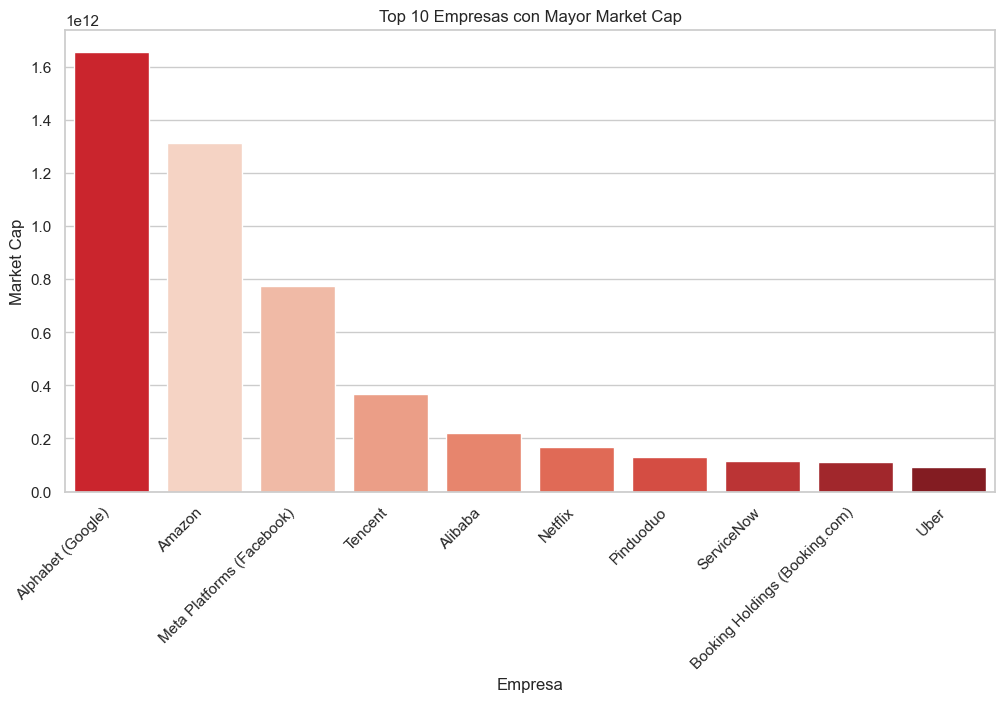

In [36]:
# Ordenamosla columna 'marketcap' de forma descendente
market_cap = market_cap.sort_values(by='marketcap', ascending=False)

# Seleccionamos las 10 empresas con mayor marketcap
top_10_empresas = market_cap.head(10)

#Estética Seaborn
sns.set(style="whitegrid")

#Configuramos el código del color del gráfico (Netflix #E50914)
color_de_netflix = "#E50914"

#Creamos una paleta de colores personalizada degrade
colores_personalizados = sns.color_palette("Reds", n_colors=len(top_10_empresas))

#Índice de la empresa con mayor marketcap
indice_max_valor = top_10_empresas['company'].values[0]

#Vemos en qué posición se encuentra en la lista de índices
posicion_max_valor = list(top_10_empresas['company']).index(indice_max_valor)

#Configuramos el color de la barra que mayor market cap tiene para que tenga el tono más oscuro
colores_personalizados[posicion_max_valor] = color_de_netflix

#Tamaño del gráfico
plt.figure(figsize=(12, 6))

#Creamos el gráfico con la paleta de colores
ax = sns.barplot(x=top_10_empresas['company'], y=top_10_empresas['marketcap'], palette=colores_personalizados)

#Etiquetas de los ejes y el título
plt.xlabel('Empresa')
plt.ylabel('Market Cap')
plt.title('Top 10 Empresas con Mayor Market Cap')

#Etiquetas del eje x
plt.xticks(rotation=45, ha='right')


plt.show()



Netflix, plataforma de streaming en la industria de medios y entretenimiento, se destaca por su impresionante base de suscriptores y su notorio valor de mercado a nivel global. Según los datos proporcionados en la tabla (actualizados hasta octubre de 2023), Netflix se posiciona como la sexta empresa más grande del mundo en términos de capitalización de mercado, consolidándose como una de las entidades más valiosas en el escenario empresarial actual.

Es relevante destacar que entre las 10 empresas con la mayor capitalización de mercado también figura Amazon, que, a su vez, ofrece la plataforma de streaming Amazon Prime Video. No obstante, se diferencia de Netflix en cuanto a su enfoque de negocio. Mientras que Netflix centra su estrategia en la adquisición y producción de contenido, posteriormente distribuido en su plataforma, para Amazon, la plataforma de streaming no representa su actividad principal. Esta distinción resalta el compromiso de Netflix con la oferta de contenido de calidad y su posición destacada en la industria del entretenimiento.

Fuente: -https://companiesmarketcap.com/internet/largest-internet-companies-by-market-cap/ -WORTEV®

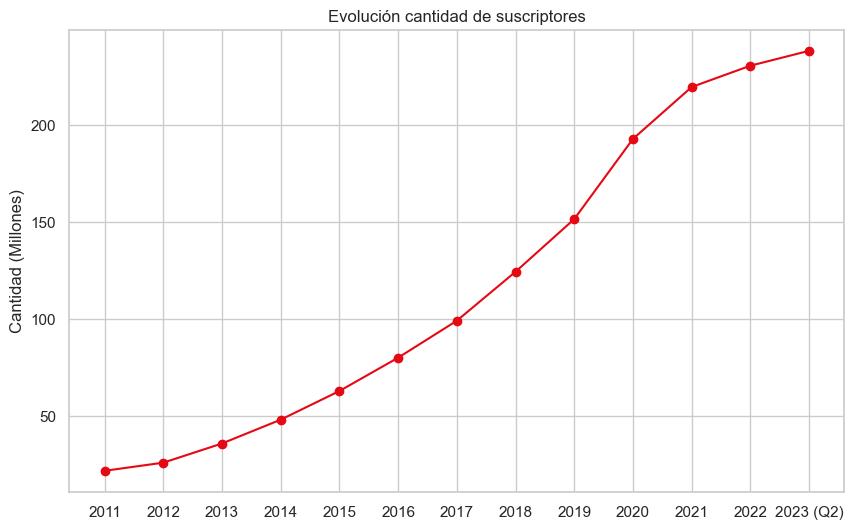

In [37]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(global_users['year'], global_users['netflix_subscribers'], marker='o', linestyle='-', color="#E50914")

# Etiquetas y título
plt.xlabel('')
plt.ylabel('Cantidad (Millones)')
plt.title('Evolución cantidad de suscriptores')

plt.show()

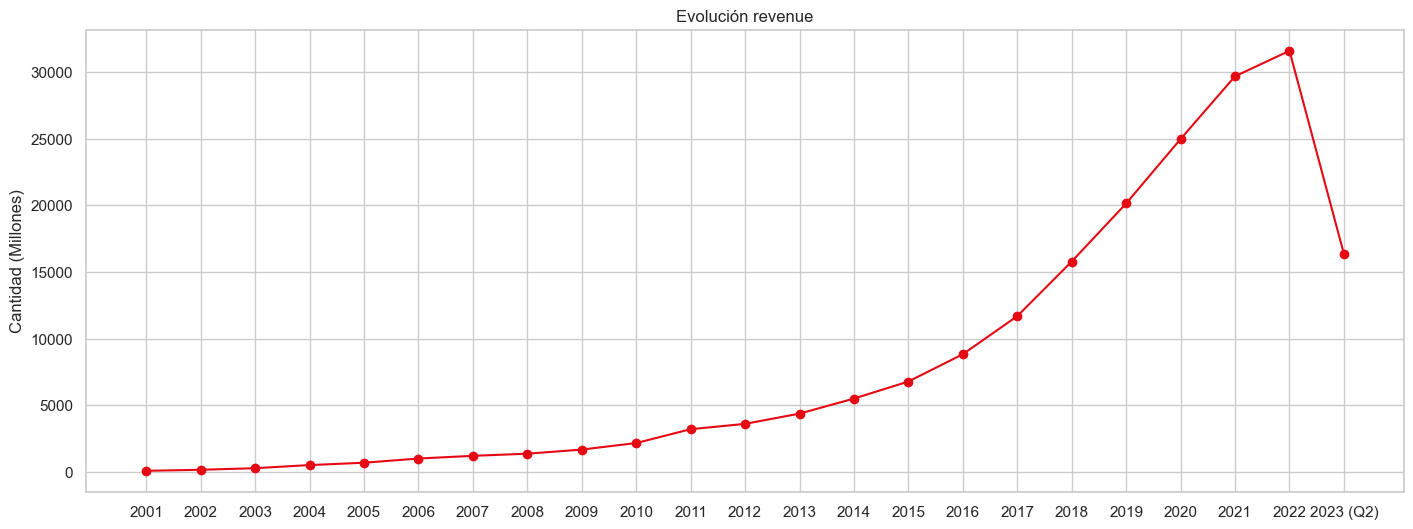

In [38]:
# Crear el gráfico de línea
plt.figure(figsize=(17, 6))
plt.plot(revenue_years['year'], revenue_years['revenue'], marker='o', linestyle='-', color="#E50914")

# Etiquetas y título
plt.xlabel('')
plt.ylabel('Cantidad (Millones)')
plt.title('Evolución revenue')

plt.show()

Netflix ha experimentado un significativo aumento en su base de suscriptores y, en consecuencia, un incremento notable en sus ganancias desde su fundación hasta la fecha actual. A pesar de que ya se observaba un crecimiento constante desde el año 2016, el año 2020 marcó un punto crucial en el aumento de estas cifras. Este hito se debió en gran parte al contexto de la pandemia, que aceleró el interés y la demanda por las plataformas de streaming.

# Análisis de contenido

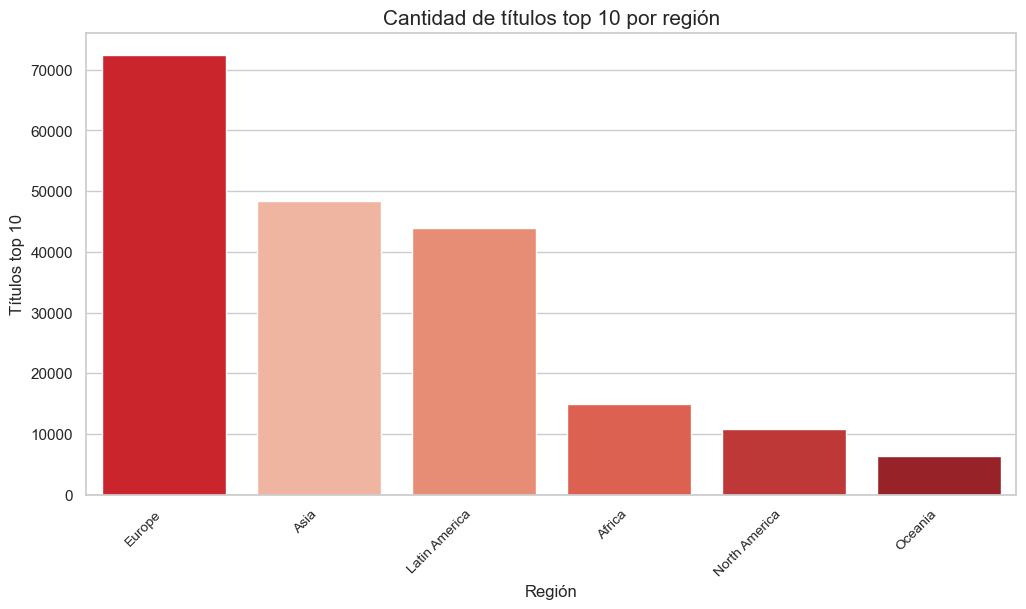

In [39]:

# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Estética Seaborn
sns.set(style="whitegrid")

# Configuración del color del gráfico (rojo oscuro)
color_rojo_oscuro = "#E50914"

# Obtener los datos de las regiones y sus recuentos
region_counts = Netflix['region'].value_counts()

# Obtener la posición de la región con más títulos
posicion_max_valor = region_counts.argmax()

# Crear una paleta de colores personalizada en degradado de rojo
colores_personalizados = sns.color_palette("Reds", n_colors=len(region_counts))

# Configurar el color de la barra con la mayor cantidad de títulos a rojo oscuro
colores_personalizados[posicion_max_valor] = color_rojo_oscuro

# Crear el gráfico de barras
sns.barplot(x=region_counts.index, y=region_counts.values, palette=colores_personalizados)

# Títulos y etiquetas
plt.title('Cantidad de títulos top 10 por región', fontsize=15)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Títulos top 10', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Mostrar el gráfico
plt.show()


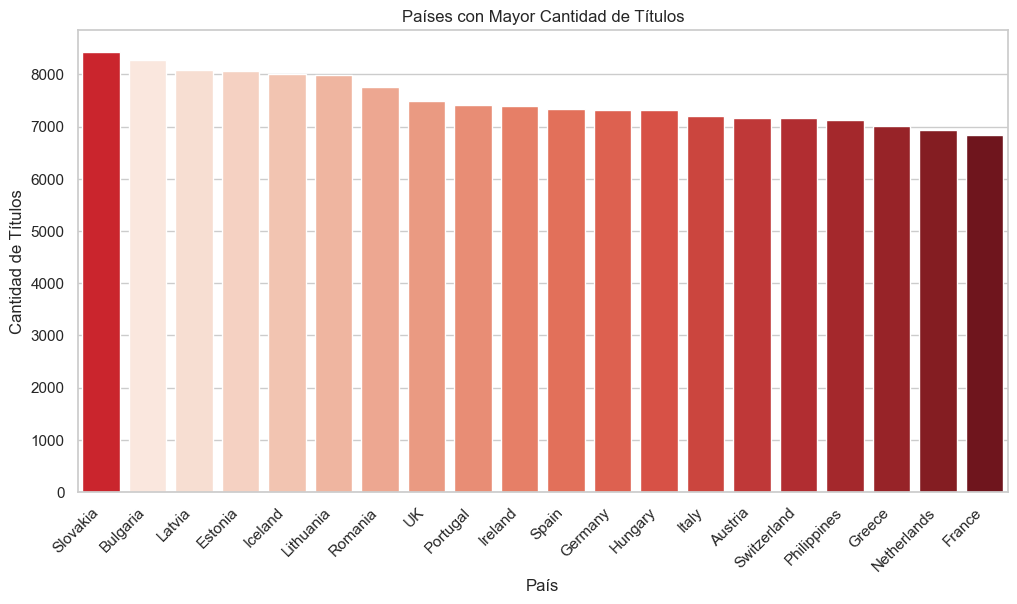

In [40]:
# Ordena los datos por library_size de forma descendente
world_libraries = world_libraries.sort_values(by='Library_size', ascending=False)

# Estética Seaborn
sns.set(style="whitegrid")

# Configura el código del color del gráfico (rojo oscuro)
color_rojo_oscuro = "#E50914"

# Creamos una paleta de colores personalizada en degradado de rojo
colores_personalizados = sns.color_palette("Reds", n_colors=len(world_libraries))


# Configura el color de la barra que tiene la mayor cantidad de librerías para que sea rojo oscuro
colores_personalizados[posicion_max_valor] = color_rojo_oscuro

# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico con la paleta de colores
ax = sns.barplot(x=world_libraries['Country'], y=world_libraries['Library_size'], palette=colores_personalizados)

# Etiquetas de los ejes y el título
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos')
plt.title('Países con Mayor Cantidad de Títulos')

# Etiquetas del eje x
plt.xticks(rotation=45, ha='right')

plt.show()

In [41]:
# Vamos a graficar la cantidad de contenido que tiene Netflix en las diferentes regiones
conteo_por_region = Netflix['region'].value_counts()

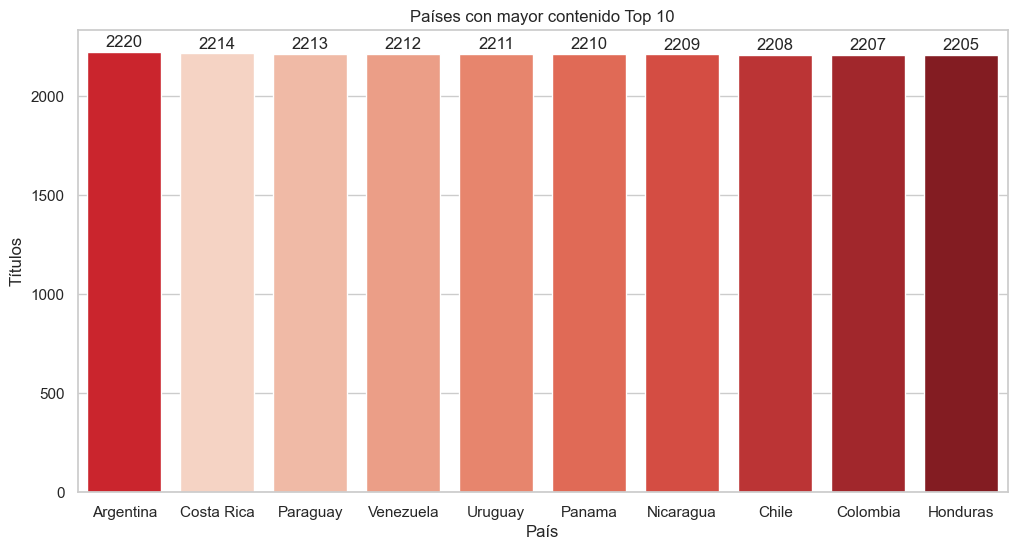

In [42]:
# Calculamos el top 10 de países con mayor cantidad de títulos que estuvieron dentro del top 10 en los últimos tres años
top_10_paises = Netflix['country_name'].value_counts().head(10)

# Estilo seaborn para darle estética al gráfico
sns.set(style="whitegrid")

# Usamos el código del color de Netflix (#E50914)
color_de_netflix = "#E50914"

# Creamos una paleta de colores personalizada con degradado
colores_personalizados = sns.color_palette("Reds", n_colors=len(top_10_paises))

# Índice del país con mayor cantidad de contenido
indice_max_valor = top_10_paises.idxmax()

# Vemos en qué posición se encuentra en la lista de índices
posicion_max_valor = list(top_10_paises.index).index(indice_max_valor)

# Configuramos el color de la barra que mayor contenido tiene para que tenga el tono más oscuro
colores_personalizados[posicion_max_valor] = color_de_netflix

# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico usando los colores personalizados
ax = sns.barplot(x=top_10_paises.index, y=top_10_paises.values, palette=colores_personalizados)

# Etiquetas de los ejes y el título
plt.xlabel('País')
plt.ylabel('Títulos')
plt.title('Países con mayor contenido Top 10')

# Etiquetas de los ejes a 0 grados
plt.xticks(rotation=0)

# Etiquetas con la cantidad de contenido en cada barra
for i, v in enumerate(top_10_paises.values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()


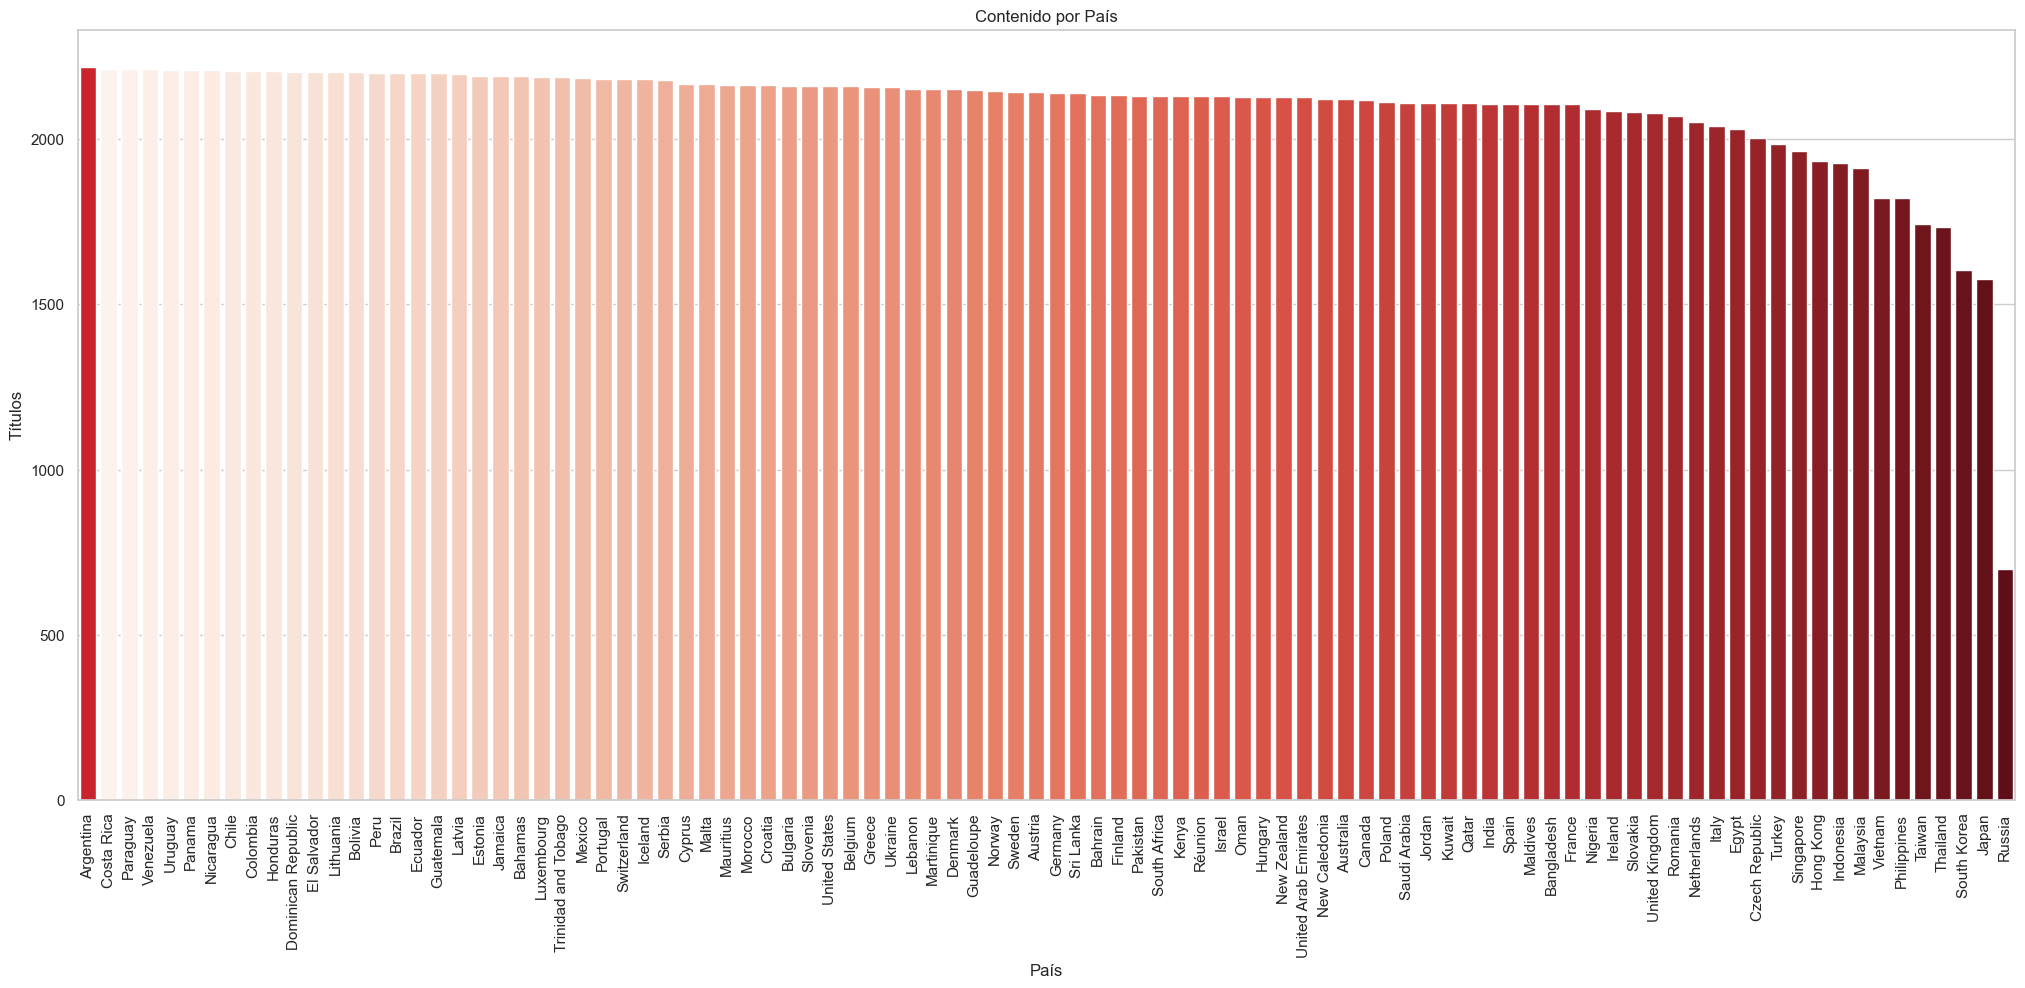

In [43]:
# Calculamos todos los países con la cantidad de títulos que estuvieron dentro del top 10 en los últimos tres años
paises_con_top_contenido = Netflix['country_name'].value_counts()

# Estilo seaborn para darle estética al gráfico
sns.set(style="whitegrid")

# Usamos el código del color de Netflix (#E50914)
color_de_netflix = "#E50914"

# Creamos una paleta de colores personalizada con degradado
colores_personalizados = sns.color_palette("Reds", n_colors=len(paises_con_top_contenido))

# Índice del país con mayor cantidad de contenido
indice_max_valor = paises_con_top_contenido.idxmax()

# Vemos en qué posición se encuentra en la lista de índices
posicion_max_valor = list(paises_con_top_contenido.index).index(indice_max_valor)

# Configuramos el color de la barra que mayor contenido tiene para que tenga el tono más oscuro
colores_personalizados[posicion_max_valor] = color_de_netflix

# Tamaño del gráfico
plt.figure(figsize=(25, 10))

# Creamos el gráfico usando los colores personalizados
ax = sns.barplot(x=paises_con_top_contenido.index, y=paises_con_top_contenido.values, palette=colores_personalizados)

# Etiquetas de los ejes y el título
plt.xlabel('País')
plt.ylabel('Títulos')
plt.title('Contenido por País')

# Etiquetas de los ejes a 0 grados
plt.xticks(rotation=90)

plt.show()



Europa es la región con la mayor cantidad de títulos que alcanzan el top 10 en las listas de popularidad. A su vez, los países europeos exhiben una extensa diversidad de títulos en sus catálogos. Sin embargo, es interesante notar que los diez primeros países con la mayor variedad de contenido top 10 pertenecen a América Latina, lo que sugiere un consumo diverso de contenidos en la región. No obstante, a excepción de algunos países en Medio Oriente, como Japón, Hong Kong, Corea del Sur, y en Occidente, como Rusia, la mayoría muestra un patrón de consumo bastante uniforme.

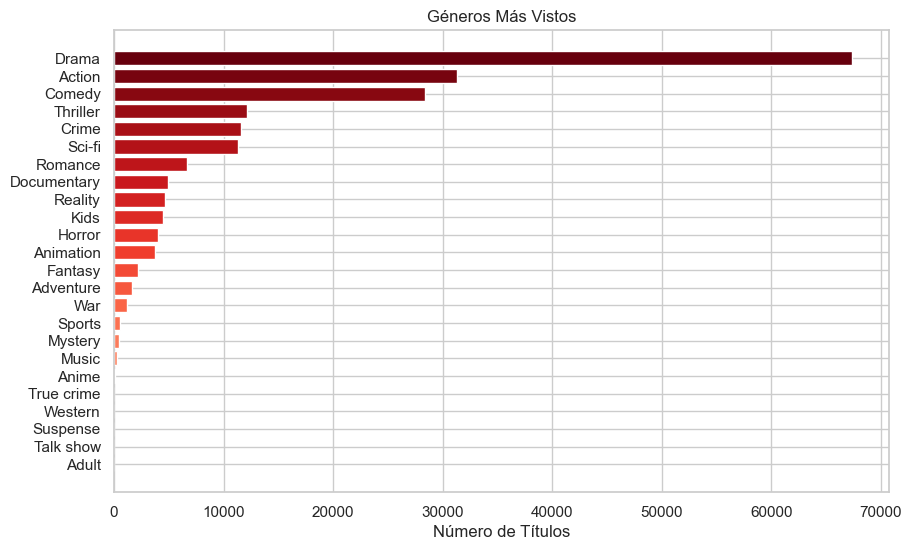

          Genre  Count
0         Drama  67376
1        Action  31292
2        Comedy  28398
3      Thriller  12158
4         Crime  11571
5        Sci-fi  11356
6       Romance   6703
7   Documentary   4963
8       Reality   4665
9          Kids   4424
10       Horror   4012
11    Animation   3718
12      Fantasy   2191
13    Adventure   1668
14          War   1193
15       Sports    533
16      Mystery    421
17        Music    234
18        Anime    105
19   True crime     27
20      Western      9
21     Suspense      4
22    Talk show      2
23        Adult      1


In [44]:
# Contamos cuántos títulos hay en cada género
genre_counts = Netflix['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Ordenamos el dataset por la cantidad de títulos en orden descendente
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Degradado de colores desde rojo oscuro (#E50914) a colores más claros
colors = plt.cm.Reds(np.linspace(1, 0.2, len(genre_counts)))

#Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(genre_counts['Genre'], genre_counts['Count'], color=colors)
plt.xlabel('Número de Títulos')
plt.title('Géneros Más Vistos')
plt.gca().invert_yaxis()  #Invertir el eje Y para que el género más visto esté en la parte superior


plt.show()

#Recuento de títulos por género
print(genre_counts)


In [45]:
# Contar la cantidad de veces que aparece cada título en todo el conjunto de datos
top_titles = Netflix['show_title'].value_counts().reset_index()
top_titles.columns = ['show_title', 'count']

# Mostrar los 10 títulos más repetidos y agregar la región a la que pertenecen
top_10_titles = top_titles.head(10)
top_10_titles['genre'] = top_10_titles['show_title'].map(Netflix.groupby('show_title')['genre'].max())

# Mostrar la tabla de los 10 títulos más repetidos con sus respectivas regiones
print(top_10_titles)

                         show_title  count   genre
0                   Stranger Things   3258   Drama
1                          Manifest   2907  Sci-fi
2                   The Good Doctor   2024   Drama
3                       Money Heist   1699   Drama
4                               You   1654   Drama
5                       The Witcher   1581  Sci-fi
6               Pasión de Gavilanes   1455   Drama
7  Pablo Escobar, el patrón del mal   1359   Crime
8                        Bridgerton   1253   Drama
9                         Wednesday   1206  Comedy


C:\Users\MGrau\AppData\Local\Temp\ipykernel_22304\1506303362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_titles['genre'] = top_10_titles['show_title'].map(Netflix.groupby('show_title')['genre'].max())


C:\Users\MGrau\AppData\Local\Temp\ipykernel_22304\3102550106.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='cumulative_weeks_in_top_10', data=Netflix,


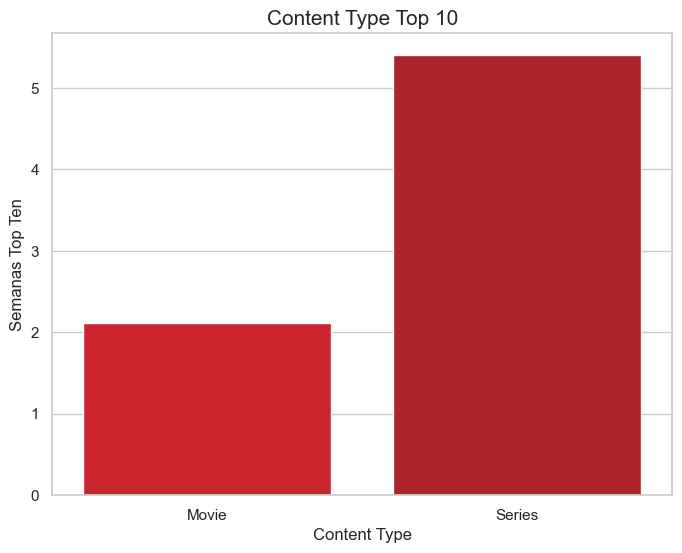

In [46]:
# Tamaño
plt.figure(figsize=(8, 6))

#Seaborn estética
sns.set(style="whitegrid")

# Obtener los conteos por categoría
genre_counts = Netflix['category'].value_counts()

# Crear un degradado de colores desde rojo oscuro (#E50914) a colores más claros
color_rojo_oscuro = "#E50914"
colors = sns.color_palette(sns.dark_palette(color_rojo_oscuro, reverse=True), n_colors=len(genre_counts))

# Crear el gráfico de barras asignando colores personalizados
sns.barplot(x='category', y='cumulative_weeks_in_top_10', data=Netflix,
            palette=colors, ci=None)

plt.title('Content Type Top 10', fontsize=15)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Semanas Top Ten', fontsize=12)


plt.show()

## Outliers

In [47]:
#Identificamos cuales son los outliers que observamos en el gráfico anterior de la columna "Capacity MW"
Feature = Netflix['cumulative_weeks_in_top_10']

# Calculamos los cuartiles y el rango intercuartil (IQR)
Q1 =  Netflix['cumulative_weeks_in_top_10'].quantile(0.25)
Q3 =  Netflix['cumulative_weeks_in_top_10'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar outliers
mínima_cantidad = Q1 - 1.5 * IQR
máxima_cantidad = Q3 + 1.5 * IQR

# Filtramos los outliers según la máxima cantidad y la mínima.
Outliers =  Netflix['cumulative_weeks_in_top_10'][(Netflix['cumulative_weeks_in_top_10'] < mínima_cantidad) | (Netflix['cumulative_weeks_in_top_10'] > máxima_cantidad)]

print("Outliers:")
print(Outliers)

Outliers:
49         7
59         7
99         7
179        7
198       82
          ..
196907     7
196908     7
196909     7
196910     7
196911     7
Name: cumulative_weeks_in_top_10, Length: 20779, dtype: int64


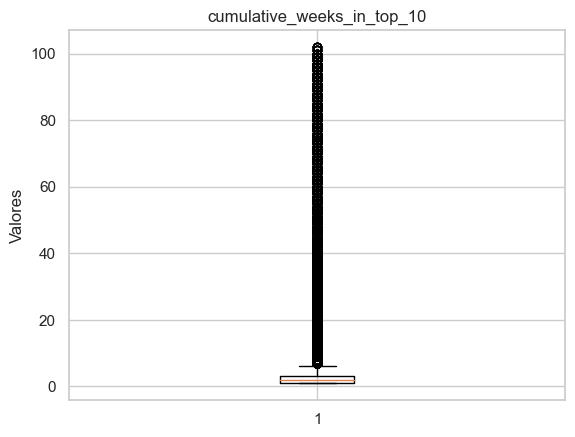

In [48]:
#Outliers
plt.boxplot(Netflix['cumulative_weeks_in_top_10'])
plt.title('cumulative_weeks_in_top_10')
plt.ylabel('Valores')
plt.show()

# Modelos

## Modelo de Regresión Lineal

Teniendo en cuenta que nuestro objetivo es predecir cuántas semanas va a estar un título top ten en las diferentes regiones, a partir de los datos históricos que nos brinda la plataforma. Las variables independientes que utilizaremos son "region, "content type","cumulative_weeks_in_top_10" y "genre". La primera es la variable cuantitativa (x) mientras que el resto son el  target (y).

Para empezar vamos a transformar las columnas string en valores enteros usando get.dummies

In [49]:
# Crea las variables dummies
genre_dummies = pd.get_dummies(Netflix['genre'], prefix='genre')
category_dummies = pd.get_dummies(Netflix['category'], prefix='category')
region_dummies = pd.get_dummies(Netflix['region'], prefix='region')


In [50]:
Netflix = pd.concat([Netflix, genre_dummies], axis=1)

In [51]:
Netflix = pd.concat([Netflix, region_dummies], axis=1)

In [52]:
Netflix = pd.concat([Netflix, category_dummies], axis=1)

In [53]:
#Importamos la libreria para realizar el modelo de regresión lineal múltiple

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
Netflix.columns

Index(['region', 'country_name', 'country_iso2', 'week', 'category',
       'weekly_rank', 'show_title', 'season_title',
       'cumulative_weeks_in_top_10', 'realease_year', 'genre', 'genre_Action',
       'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Anime',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Horror', 'genre_Kids', 'genre_Music',
       'genre_Mystery', 'genre_Reality', 'genre_Romance', 'genre_Sci-fi',
       'genre_Sports', 'genre_Suspense', 'genre_Talk show', 'genre_Thriller',
       'genre_True crime', 'genre_War', 'genre_Western', 'region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania', 'category_Movie',
       'category_Series'],
      dtype='object')

In [55]:
#Ruta del archivo xlsx
data_path = os.path.join(os.getcwd(), "netflix_modelo.xlsx")

data_path

'C:\\Users\\MGrau\\OneDrive\\Data Science\\Dataset Netflix\\Netflix Proyect\\netflix_modelo.xlsx'

# Seleccion de target (y) y variables (X)

In [56]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = Netflix.drop(['country_name', 'country_iso2',"week","show_title","season_title",'realease_year'], 
                  axis=1)

In [57]:
x.head()

,region,category,weekly_rank,cumulative_weeks_in_top_10,genre,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Anime,...,genre_War,genre_Western,region_Africa,region_Asia,region_Europe,region_Latin America,region_North America,region_Oceania,category_Movie,category_Series
0,Latin America,Movie,1,1,Action,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Latin America,Movie,2,2,Comedy,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,Latin America,Movie,3,2,Horror,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,Latin America,Movie,4,2,Adventure,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Latin America,Movie,5,3,Action,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [58]:
lista_atributos = x.columns

In [59]:
# Definir las características (variables independientes)

X = Netflix[['region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania','category_Movie',
       'category_Series','genre_Action',
       'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Anime',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Horror', 'genre_Kids', 'genre_Music',
       'genre_Mystery', 'genre_Reality', 'genre_Romance', 'genre_Sci-fi',
       'genre_Sports', 'genre_Suspense', 'genre_Talk show', 'genre_Thriller',
       'genre_True crime', 'genre_War', 'genre_Western', "weekly_rank"]]

# Definir la variable objetivo (variable a predecir)
y = Netflix['cumulative_weeks_in_top_10']

In [60]:
x, y = np.array(x), np.array(y)

In [61]:
x

array([['Latin America', 'Movie', 1, ..., 0, 1, 0],
       ['Latin America', 'Movie', 2, ..., 0, 1, 0],
       ['Latin America', 'Movie', 3, ..., 0, 1, 0],
       ...,
       ['Asia', 'Series', 8, ..., 0, 0, 1],
       ['Asia', 'Series', 9, ..., 0, 0, 1],
       ['Asia', 'Series', 10, ..., 0, 0, 1]], dtype=object)

In [62]:
y[:10]

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1], dtype=int64)

# Separando Train / Test

Separamos el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test, y_test) usando la función train_test_split de scikit-learn.

In [63]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

In [65]:
x.shape

(197024, 37)

In [66]:
X_train.shape

(157619, 37)

In [67]:
X_test.shape

(39405, 37)

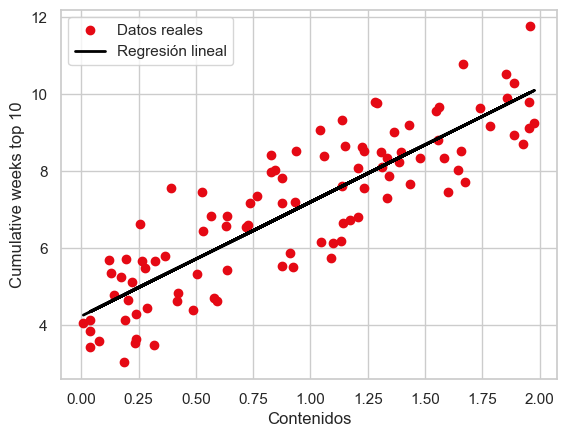

In [68]:
#Paso 2: Generar datos de ejemplo

# Crear datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
#Paso 3: Ajustar el modelo de regresión lineal

#Utiliza la biblioteca scikit-learn para ajustar el modelo de regresión lineal a tus datos.

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)
#Paso 4: Hacer predicciones
#Puedes usar el modelo entrenado para hacer predicciones sobre nuevos datos o para obtener las predicciones en los datos de entrenamiento.


# Hacer predicciones
y_pred = modelo.predict(X)

#Paso 5: Graficar los datos y la regresión lineal

#Finalmente, utiliza matplotlib para graficar los datos originales y la línea de regresión lineal ajustada.


# Graficar los datos de entrada y salida
plt.scatter(X, y, color='#E50914', label='Datos reales')

# Graficar la línea de regresión lineal
plt.plot(X, y_pred, color='black', linewidth=2, label='Regresión lineal')

# Agregar etiquetas y leyenda
plt.xlabel('Contenidos')
plt.ylabel('Cumulative weeks top 10')
plt.legend()

plt.show()


## MAE

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error #Importar desde la biblioteca

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal y ajustarlo a los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 0.8014554834253336


## Árboles de decisión

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = Netflix.drop(['country_name', 'country_iso2',"week","show_title","season_title",'realease_year'], 
                  axis=1)

In [72]:
# Definir las características (variables independientes)

X = Netflix[['region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania','category_Movie',
       'category_Series','genre_Action',
       'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Anime',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Horror', 'genre_Kids', 'genre_Music',
       'genre_Mystery', 'genre_Reality', 'genre_Romance', 'genre_Sci-fi',
       'genre_Sports', 'genre_Suspense', 'genre_Talk show', 'genre_Thriller',
       'genre_True crime', 'genre_War', 'genre_Western',"weekly_rank"]]

# Definir la variable objetivo (variable a predecir)
y = Netflix['cumulative_weeks_in_top_10']

In [73]:
# División de los datos en conjuntos de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Creación de instancia del modelo de árbol de decisión para regresión
reg = DecisionTreeRegressor()

# Se entrena el modelo
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
#Realización de predicciones en el conjunto test
y_pred = reg.predict(X_test)

# Evaluar el rendimiento del modelo de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R-cuadrado (R2 Score):", r2)

Error cuadrático medio (MSE): 43.30254370125519
R-cuadrado (R2 Score): 0.24631076816006758


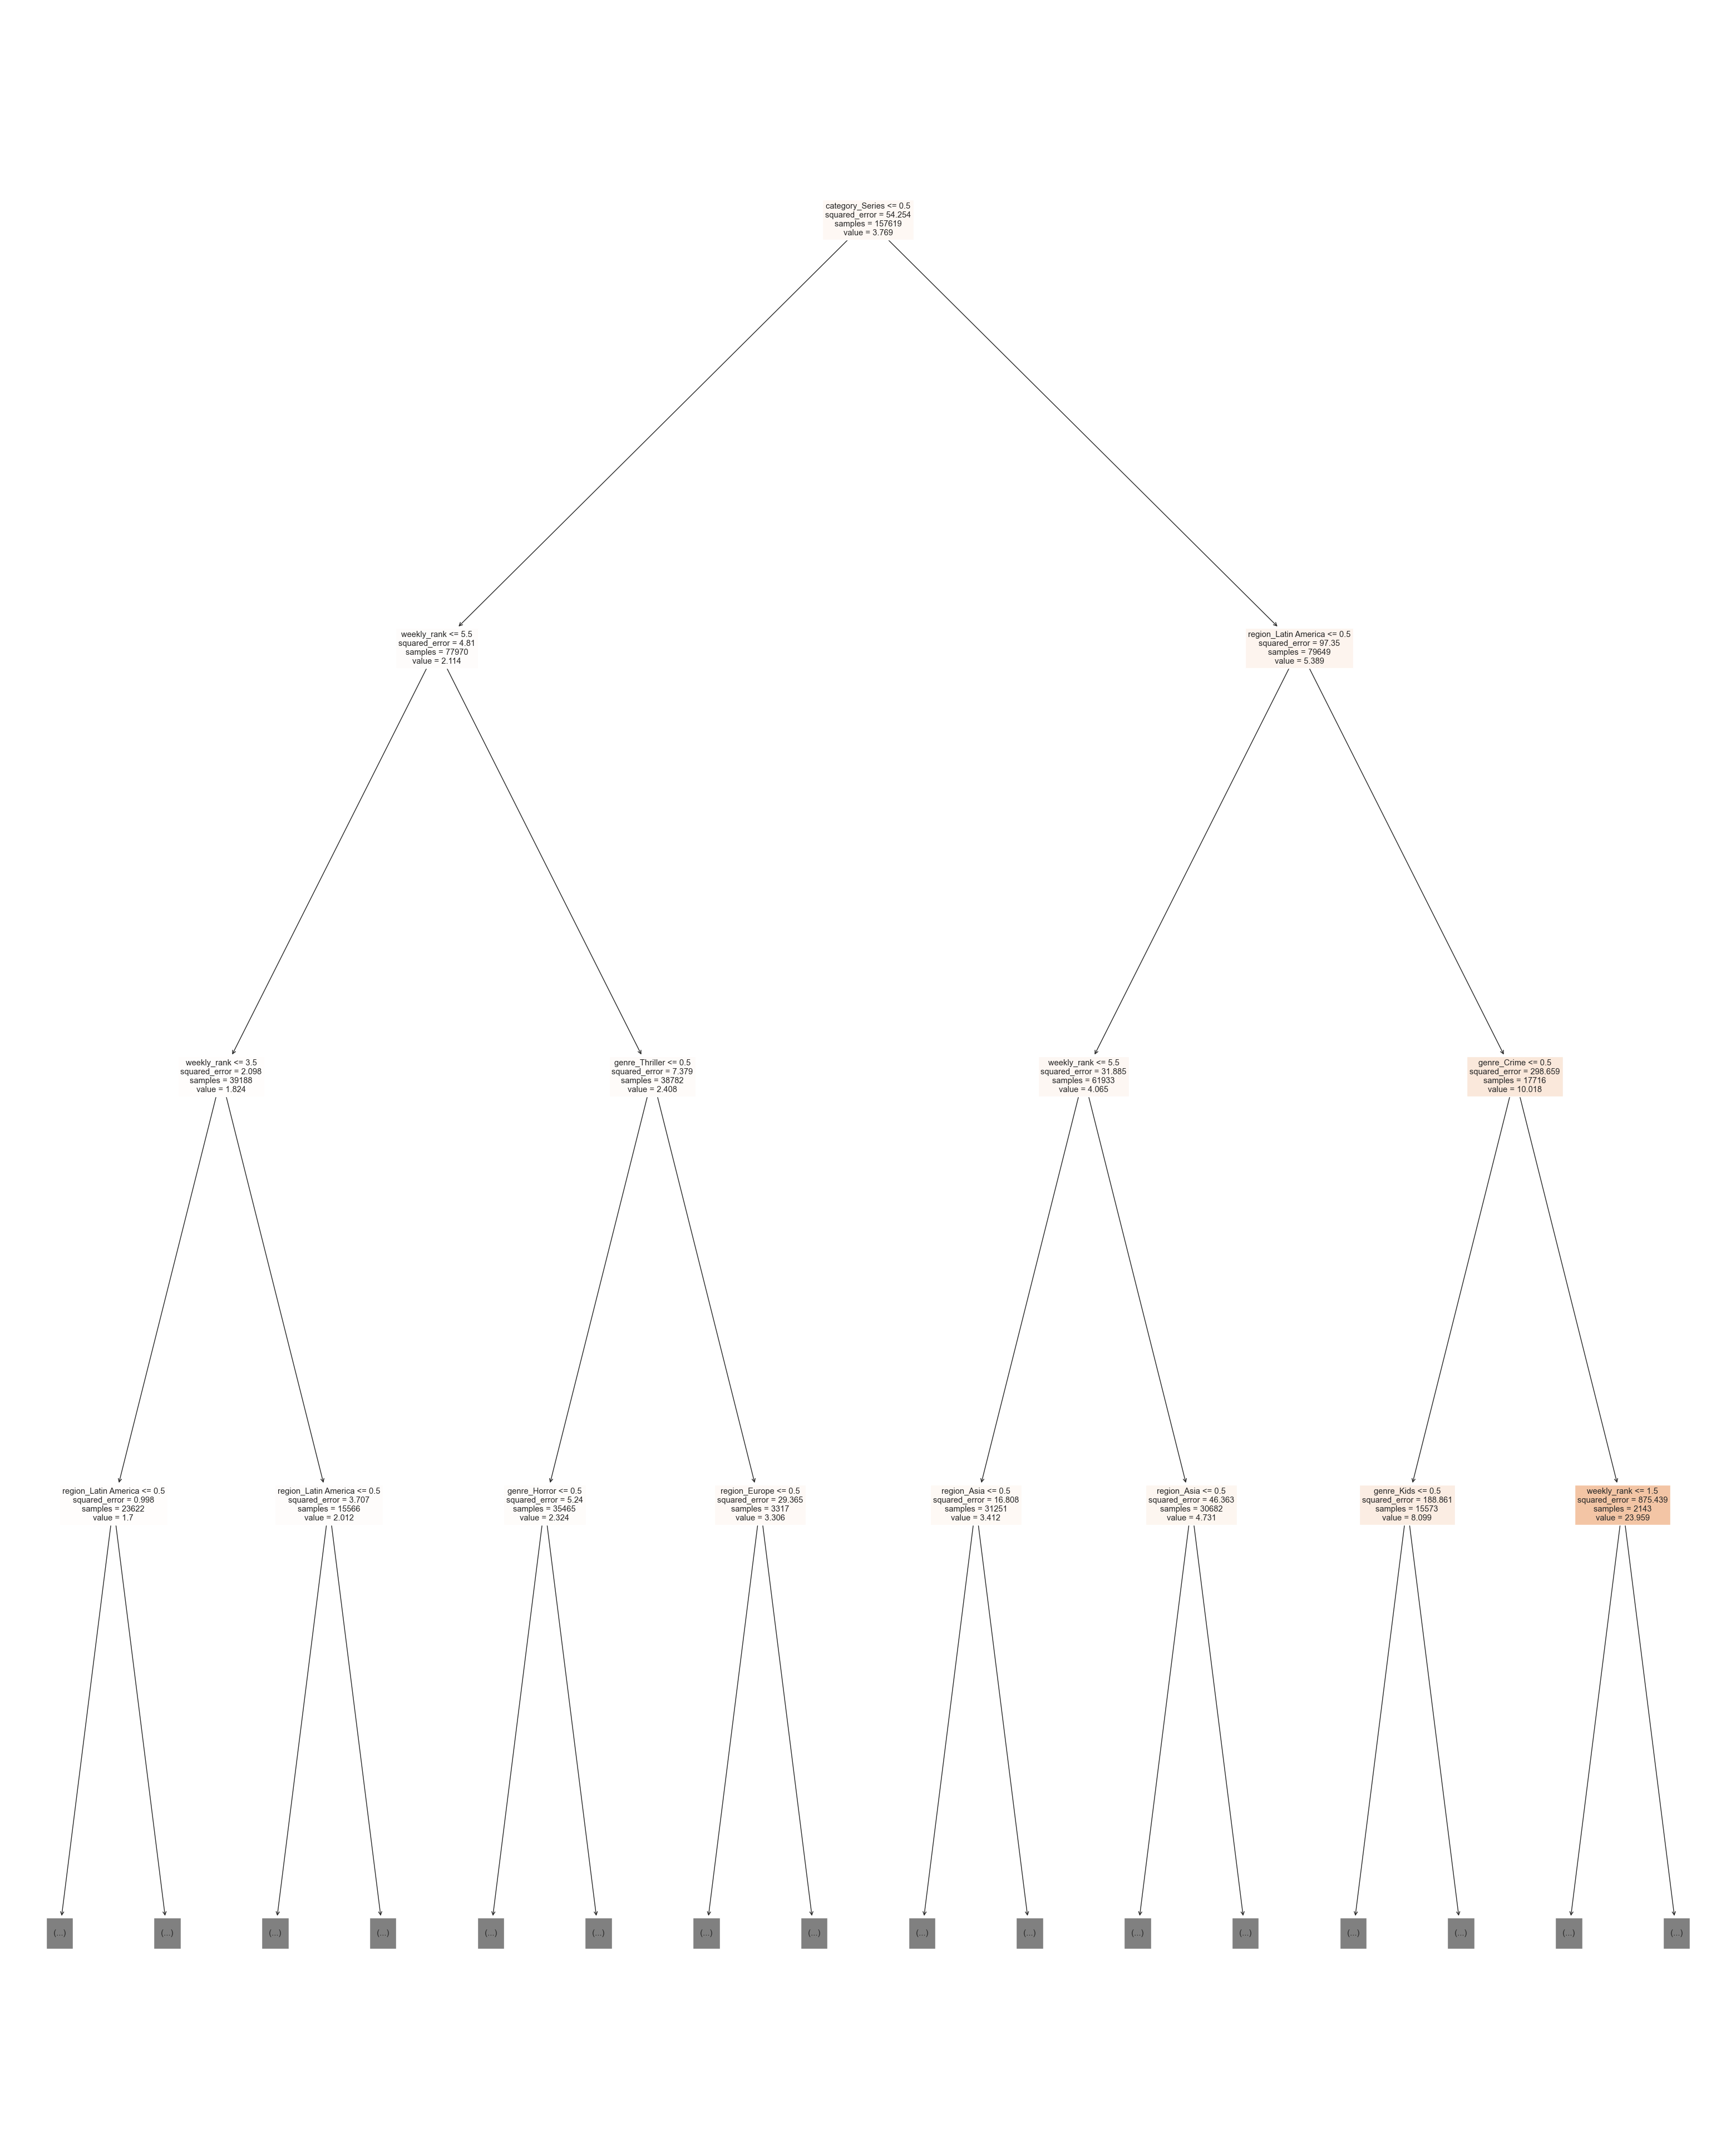

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = ["Una semana", "5 semanas", "Más de 10 semanas"]

feature_names = ['region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania','category_Movie',
       'category_Series','genre_Action',
       'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Anime',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Horror', 'genre_Kids', 'genre_Music',
       'genre_Mystery', 'genre_Reality', 'genre_Romance', 'genre_Sci-fi',
       'genre_Sports', 'genre_Suspense', 'genre_Talk show', 'genre_Thriller',
       'genre_True crime', 'genre_War', 'genre_Western',"weekly_rank"]


# Limitación de la profundidad del árbol a 3
max_depth = 3

plt.figure(figsize=(40, 50))

# Visualización del árbol con profundidad limitada
plot_tree(reg, filled=True, feature_names=feature_names, class_names=class_names, max_depth=max_depth)

plt.show()

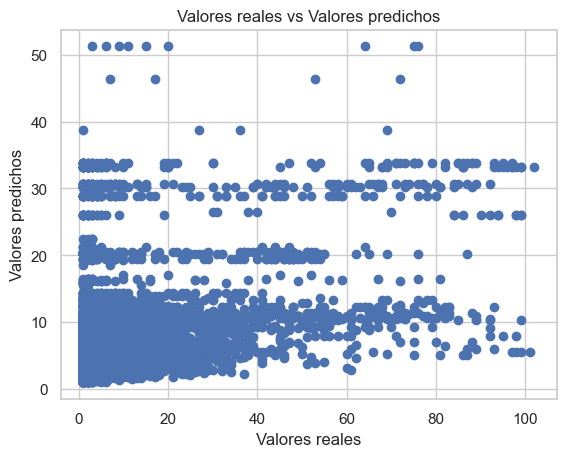

In [77]:
# Realizar predicciones
y_pred = reg.predict(X_test)

# Gráfico de dispersión de valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')
plt.show()


**Métricas de evalución del modelo**

In [78]:
from sklearn.model_selection import GridSearchCV
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [2, 4, 6]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_

# Crear el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
best_model.fit(X_train, y_train)
#Reentrenamos el modelo usando los hiperparámetros óptimos encontrados

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

In [79]:
# Definir el modelo con los hiperparámetros específicos
best_model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = Netflix.drop(['country_name', 'country_iso2',"week","show_title","season_title",'realease_year'], 
                  axis=1)

In [82]:
# Definir las características (variables independientes)

X = Netflix[['region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania','category_Movie',
       'category_Series','genre_Action',
       'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Anime',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Horror', 'genre_Kids', 'genre_Music',
       'genre_Mystery', 'genre_Reality', 'genre_Romance', 'genre_Sci-fi',
       'genre_Sports', 'genre_Suspense', 'genre_Talk show', 'genre_Thriller',
       'genre_True crime', 'genre_War', 'genre_Western']]

# Definir la variable objetivo (variable a predecir)
y = Netflix['cumulative_weeks_in_top_10']

In [83]:
# División de los datos en conjuntos de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Creamos y entrenamos el modelo de regresión Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators y otros hiperparámetros
random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [85]:
# Realizamos predicciones en el conjunto de prueba
y_pred = random_forest_regressor.predict(X_test)

In [86]:
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 45.58033316109415
R-squared (R2): 0.20666539766814063


El MSE de 45.58 y el R-squared de 0.20 indican que el modelo no tiene un buen rendimiento para las predicciones que queremos realizar. El MSE debería ser más cercano a 0 (cero), mientras que el R-Squared debería acercarse a 1 para que se ajuste mejor al modelado de datos. Por lo tanto, concluimos que el modelo tiene un ajuste limitado a los datos.

**Ajuste Hiperparámetro: Random Forest**

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# Definir el modelo
model = RandomForestRegressor()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],  # Valores posibles para el número de árboles
    'max_depth': [10, 20, 30],  # Valores posibles para la profundidad máxima del árbol
    'min_samples_split': [2, 5, 10]  # Valores posibles para el número mínimo de muestras requeridas para dividir un nodo
}

In [89]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [105]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'data' que contiene tus datos, asegúrate de cargarlo adecuadamente

# Seleccionar las columnas 'week' y 'genre' para el análisis de agrupamiento
selected_columns = ['region_Africa',
       'region_Asia', 'region_Europe', 'region_Latin America',
       'region_North America', 'region_Oceania',"cumulative_weeks_in_top_10"]
data_subset = Netflix[selected_columns]




C:\Users\MGrau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


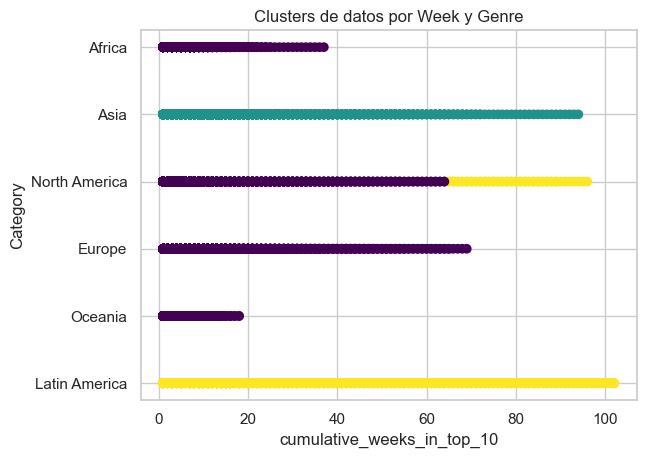

In [107]:

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Define el número de clusters que deseas encontrar
kmeans.fit(data_normalized)

# Asignar etiquetas de clusters a cada fila en los datos
cluster_labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
Netflix['Cluster'] = cluster_labels

# Visualizar los clusters (para este caso, solo se muestran dos dimensiones)
plt.scatter(Netflix['cumulative_weeks_in_top_10'], Netflix['region'], c=Netflix['Cluster'], cmap='viridis')
plt.xlabel('cumulative_weeks_in_top_10')
plt.ylabel('Category')
plt.title('Clusters de datos por Week y Genre')
plt.show()
